---

#  mplfinance: using lines for trends, support, and trading

---

### Sometimes it is convenient to draw straight lines ontop of an ohlc or candlestick chart, for example:
- Horizontal lines to mark levels of support and resistance
- Vertical lines to indicate the start or end of trading sessions, or to indicate the time or date when a trade took place.
- Trend lines to highlight a trend in the movement of prices.

#### `mpf.plot()` supports the drawing of straight lines on top of an ohlc or candlestick chart using one or more of the following four kwargs:

| keyword | argument | action |
|:---|:---|:---|
| **`hlines`** | price, or sequence of prices | draw horizontal line(s) at a specified price level(s). |
| **`vlines`** | date[time], or sequence of date[time] | draw vertical line(s) at a specified date(s) or time(s). |
| **`alines`** | two or more date/price pairs, or<br> a sequence of two or more date/price pairs, or<br> a sequence of sequences of two or more date/price pairs | draw an arbitrary line by specifying two or more x,y pairs,<br>for example: (dateA,priceA),(dateB,priceB) to draw a line from point (dateA,priceA) to point (dateB,priceB).<br>this may be done for various reasons, including to highlight a trend or trends. |
| **`tlines`** | a list of one or more pairs of date[time]s | - calculate and draw a trend line between each pair of user specified date[time]s<br>- value used at each date[time] may be open ,close, high, or low,<br>&nbsp;&nbsp;or the average of any combination thereof<br>- trend line may be 'point-to-point' or 'least-squares' fit |

---
In every case, the argument may be either as specified in the above table<br>**OR the argument may be a dict** containing the above mentioned keyword and argument specified above,<br> **plus** any or all of the following keywords to modify the line(s) being drawn:

- `colors`
- `linestyle`
- `linewidths`

For example, both of the following are valid specifications for `hlines`:
- `hlines=(123.0,128.0)`
- `hlines=dict( hlines=(123.0,128.0),colors=['r','g','b'],linestyle='dotted',linewidths=(3,4) )`

---

### See below for specific example usage of each of the kwargs:<br>&nbsp;&nbsp;`hlines`, `vlines`, `alines`, and `tlines`

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
daily = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [4]:
import mplfinance as mpf

**Plot two horizontal lines to show support and resistance:**

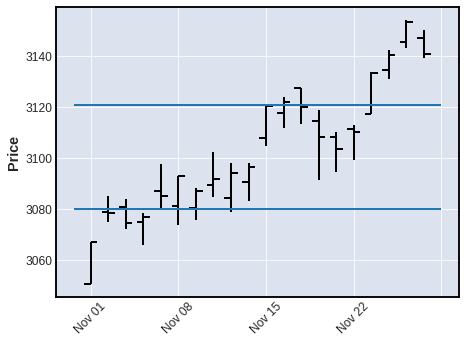

In [5]:
mpf.plot(daily,hlines=[3080,3121])

---

**color the lines, and modify the line style:**

(works with candlesticks too)

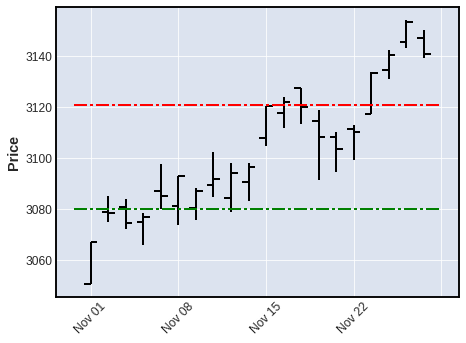

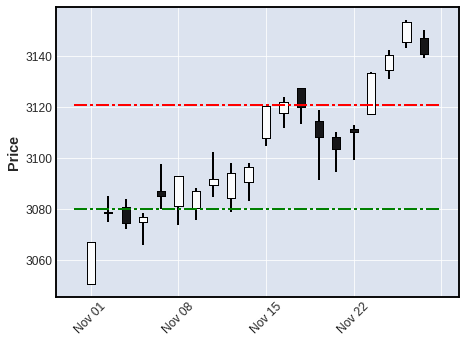

In [6]:
mpf.plot(daily,hlines=dict(hlines=[3080,3121],colors=['g','r'],linestyle='-.'))
mpf.plot(daily,hlines=dict(hlines=[3080,3121],colors=['g','r'],linestyle='-.'),type='candle')